In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##Cleaning & Preparing the data

In [40]:
df = pd.read_csv('Titanic-Dataset.csv')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

##Train & Test split

In [41]:
x = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=500)

##Model Training

In [42]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

##Prediction & Accuracy

In [43]:
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.770949720670391


##Displaying a Confuction Matrix

[[87 21]
 [20 51]]


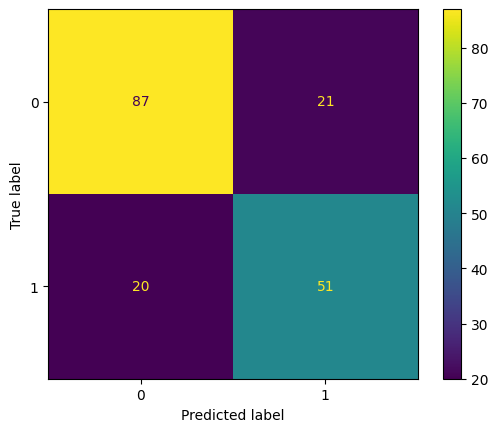

In [44]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()